# Steps
1. Import libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import numpy as np

1. Load and Explore the Dataset
- Use Python with libraries like pandas.
- Load the dataset from the IRIS.csv file you provided.

In [56]:
df = pd.read_csv("./IRIS.csv")

print(df.head())
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


3. Preprocess the Data
- Check if any cleaning is required (e.g., remove duplicates, handle missing values if any).
- Separate features (sepal/petal measurements) and target labels (species)

In [57]:
# Remove duplicates, handle missing values
print(f"Remaining duplicates: {df.isnull().sum()}")

Remaining duplicates: sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [58]:
# Remove duplicates, handle missing values
print(f"Remaining duplicates: {df.duplicated().sum()}")

Remaining duplicates: 3


In [59]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()
print(f"Remaining duplicates: {df_cleaned.duplicated().sum()}")

Remaining duplicates: 0


In [60]:
X = df.iloc[:, :-1]  # Features (first 4 columns)
y = df.iloc[:, -1]   # Labels (last column)

4. Split the Dataset into Training and Testing Sets
- Use train_test_split from sklearn to divide the dataset

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Select and Train a Classification Model
- Use machine learning models such as:

   - K-Nearest Neighbors (KNN)
   - Decision Trees
   - Support Vector Machines (SVM)
   - Logistic Regression

In [62]:
# Create the model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

6. Evaluate the Model
- Use the test set to make predictions and evaluate the model’s accuracy

In [63]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


7. Test the Model with New Data (Optional)

In [64]:
new_data = [[5.1, 3.5, 1.4, 0.2]]  
prediction = knn.predict(new_data)
print(f"Predicted Species: {prediction[0]}")

Predicted Species: Iris-setosa


c:\Users\khale\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Plot Description

In [65]:
# Load the dataset
df = pd.read_csv("./IRIS.csv")

# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [66]:
# Map species names to integers for visualization
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_mapped = np.array([species_mapping[species] for species in y])
# y_mapped.sum()
y_mapped

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:, :2], y_train)  # Use only the first two features for 2D visualization

KNeighborsClassifier(n_neighbors=3)

In [68]:
# Define mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
xx , yy

(array([[3.3, 3.4, 3.5, ..., 8.6, 8.7, 8.8],
        [3.3, 3.4, 3.5, ..., 8.6, 8.7, 8.8],
        [3.3, 3.4, 3.5, ..., 8.6, 8.7, 8.8],
        ...,
        [3.3, 3.4, 3.5, ..., 8.6, 8.7, 8.8],
        [3.3, 3.4, 3.5, ..., 8.6, 8.7, 8.8],
        [3.3, 3.4, 3.5, ..., 8.6, 8.7, 8.8]]),
 array([[1. , 1. , 1. , ..., 1. , 1. , 1. ],
        [1.1, 1.1, 1.1, ..., 1.1, 1.1, 1.1],
        [1.2, 1.2, 1.2, ..., 1.2, 1.2, 1.2],
        ...,
        [5.1, 5.1, 5.1, ..., 5.1, 5.1, 5.1],
        [5.2, 5.2, 5.2, ..., 5.2, 5.2, 5.2],
        [5.3, 5.3, 5.3, ..., 5.3, 5.3, 5.3]]))

In [69]:
# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

In [70]:
# Plot decision boundary and training points
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

<Figure size 1000x600 with 0 Axes>

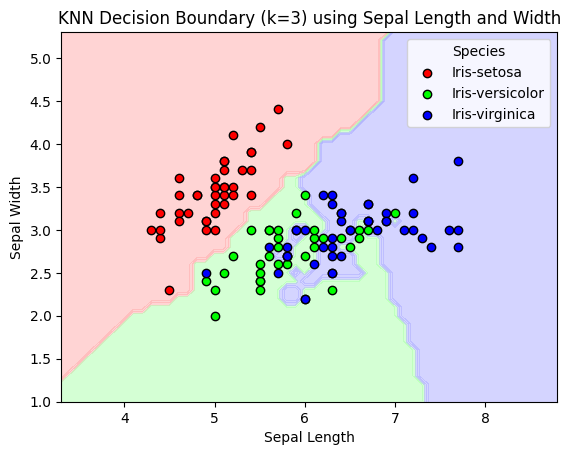

In [71]:
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_light)

# Scatter plot for training data
for idx, species in species_mapping.items():
    plt.scatter(
        X_train[y_train == species, 0],
        X_train[y_train == species, 1],
        c=cmap_bold[species], label=idx, edgecolor='k'
    )

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Decision Boundary (k=3) using Sepal Length and Width')
plt.legend(title='Species')
plt.show()